# Neighborhood processing

![pandas](https://images.unsplash.com/photo-1649073586428-e288125d930a?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1332&q=80)


photo by [julien Tromeur](https://unsplash.com/@julientromeur) at [Unsplash](https://unsplash.com/)


## Introduction

this is the companion colab code for my tutorial in medium about introduction to medical images in Python , please read the article for better understanding of the code.  
this is a colab notebook, you can test in colab (all the code has been tested and you do not need to set your machine)

[article](https://)



note: the articles will be publish soon

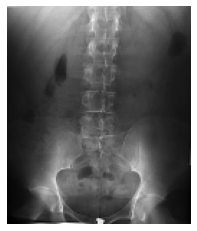

In [ ]:
#loading image from url
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from skimage.transform import rescale
from skimage import  color
import scipy.ndimage as ndi
#url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Lat_lebka.jpg/330px-Lat_lebka.jpg"
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d0/AP_lumbar_xray.jpg/255px-AP_lumbar_xray.jpg"
a = io.imread(url)

im = color.rgb2gray(a)
#rescaling
a = image_rescaled = rescale(im, 0.5, anti_aliasing=False)
plt.imshow(a, cmap = "gray")
plt.axis('off')
plt.show()


In [ ]:
from skimage import data, img_as_float
from skimage import exposure
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """

    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  app.launch_new_instance()


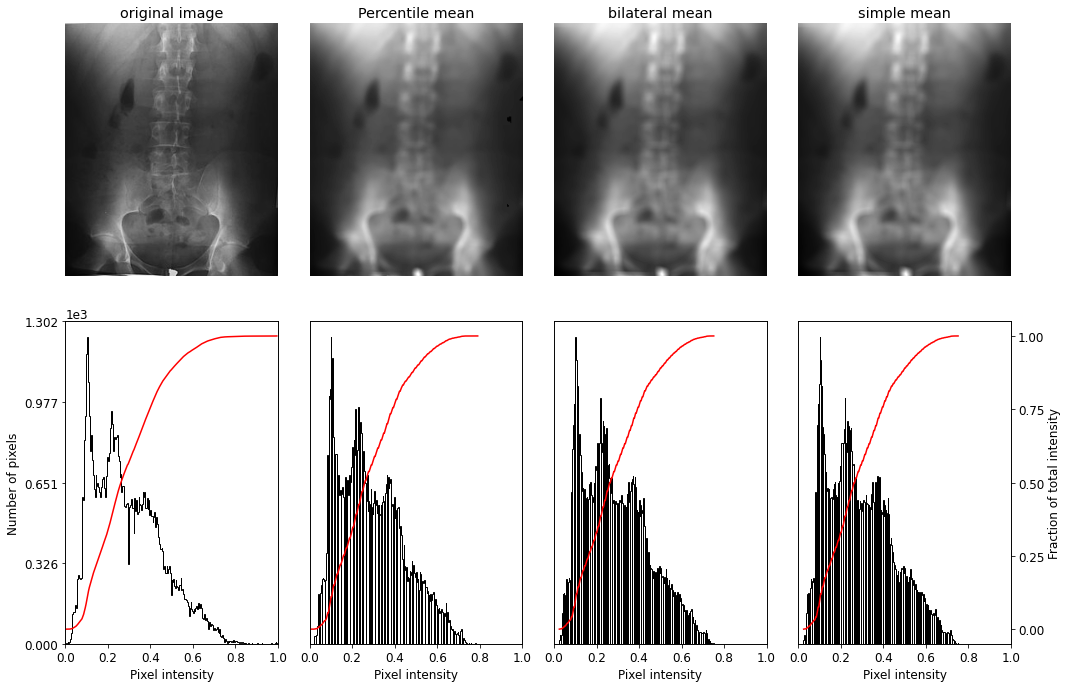

In [ ]:
matplotlib.rcParams['font.size'] = 12

from skimage.filters import rank
from skimage.morphology import disk
selem = disk(5)

# Load an example image
img = im

percentile_result = rank.mean_percentile(img, selem=selem, p0=.1, p1=.9)
bilateral_result = rank.mean_bilateral(img, selem=selem, s0=500, s1=500)
normal_result = rank.mean(img, selem=selem)

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(percentile_result, axes[:, 1])
ax_img.set_title('Percentile mean')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(bilateral_result, axes[:, 2])
ax_img.set_title('bilateral mean')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(normal_result, axes[:, 3])
ax_img.set_title('simple mean')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


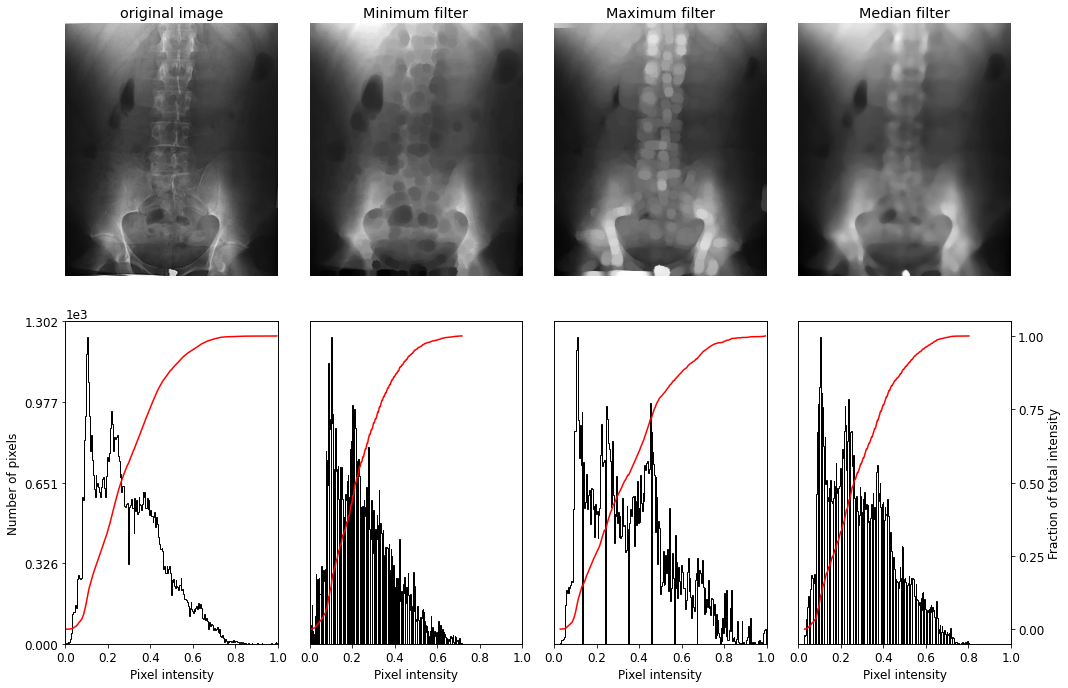

In [ ]:
### MEDIAN MINIMUM MAXIMUM
matplotlib.rcParams['font.size'] = 12

from skimage.filters import rank
from skimage.morphology import disk
selem = disk(5)

# Load an example image
img = im

minimum_result = rank.minimum(img, selem=selem)
maximum_result = rank.maximum(img, selem=selem)
median_result = rank.median(img, selem=selem)

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(minimum_result, axes[:, 1])
ax_img.set_title('Minimum filter')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(maximum_result, axes[:, 2])
ax_img.set_title('Maximum filter')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(median_result, axes[:, 3])
ax_img.set_title('Median filter')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

In [ ]:
import random

def salt_pepper_noise(img, floating = True):
  row , col = img.shape
  if floating== True:
      white = 1.
      black = 0.
  else:
      white = 255
      black = 0
  n_pixels = random.randint(0,2000)
  print("n pixel modified:")
  print(n_pixels)
  for i in range(n_pixels):
    y_coord=random.randint(0, col - 1)
    x_coord=random.randint(0, row - 1)
    img[x_coord,y_coord ] = white
  for i in range(n_pixels):
    y_coord=random.randint(0, col - 1)
    x_coord=random.randint(0, row - 1)
    img[x_coord,y_coord ] = black
  return img

n pixel modified:
951


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


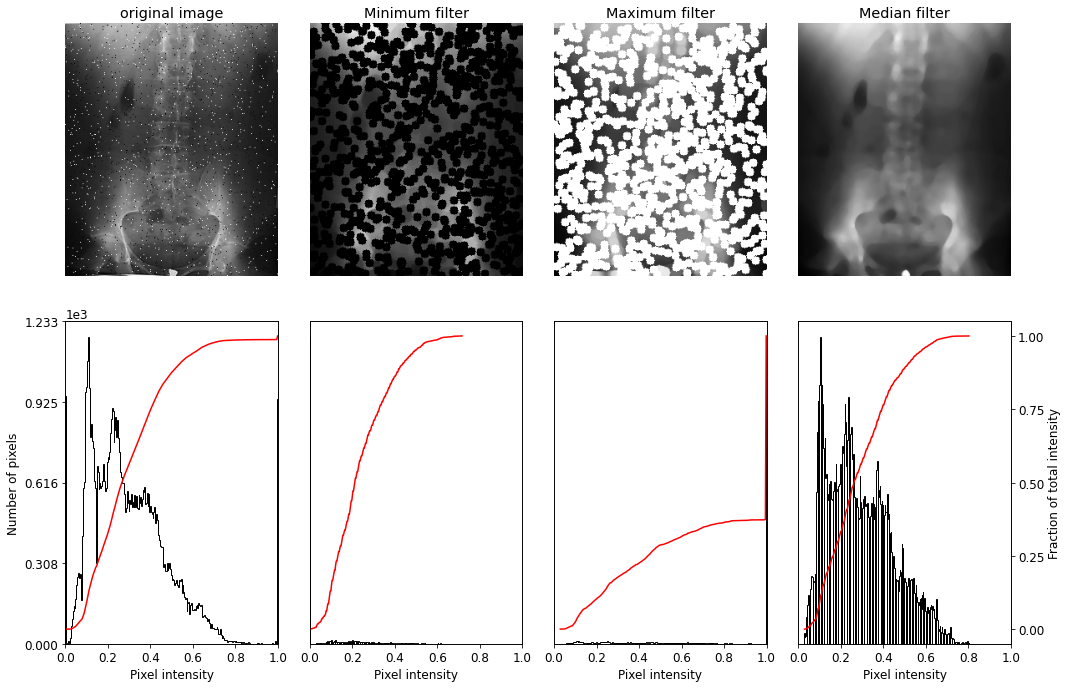

In [ ]:
### MEDIAN MINIMUM MAXIMUM
import copy
matplotlib.rcParams['font.size'] = 12

from skimage.filters import rank
from skimage.morphology import disk
selem = disk(5)
img =copy.deepcopy(im)
# Load an example image
img = salt_pepper_noise(img = img)

minimum_result = rank.minimum(img, selem=selem)
maximum_result = rank.maximum(img, selem=selem)
median_result = rank.median(img, selem=selem)

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(minimum_result, axes[:, 1])
ax_img.set_title('Minimum filter')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(maximum_result, axes[:, 2])
ax_img.set_title('Maximum filter')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(median_result, axes[:, 3])
ax_img.set_title('Median filter')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


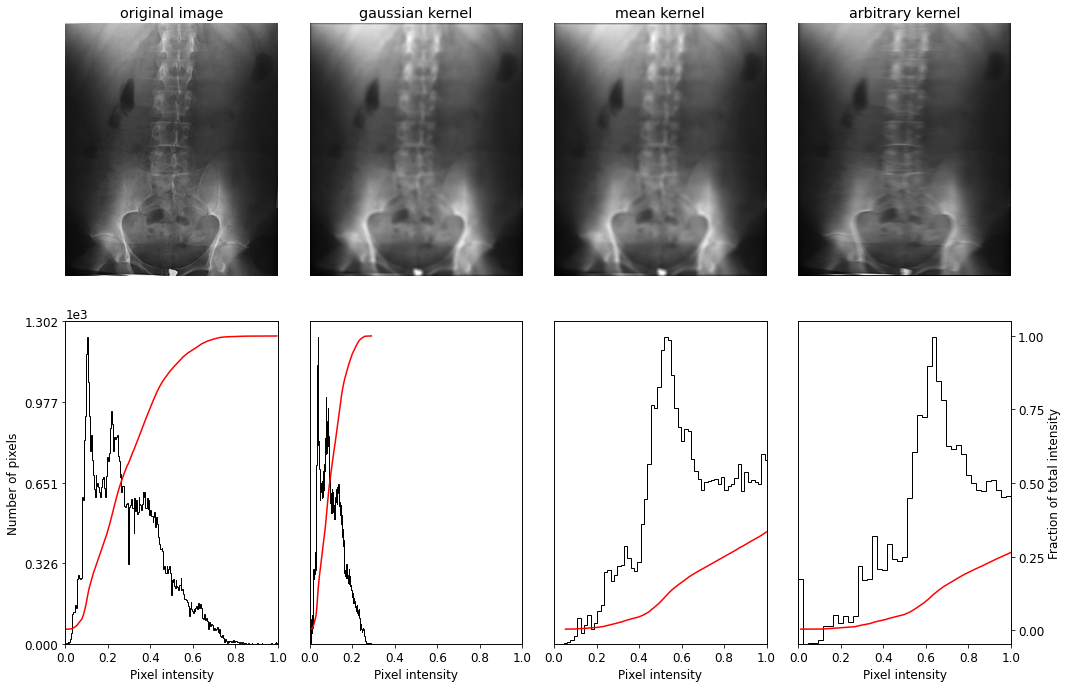

In [ ]:
### Convolution
import copy
from scipy.ndimage import convolve
matplotlib.rcParams['font.size'] = 12

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    kernel =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return kernel

def mean_kernel(size):
    kernel =np.ones((size, size))
    kernel = kernel/size
    return kernel

img =copy.deepcopy(im)

filt1 = np.array(gaussian_kernel(5, sigma=3))
conv1 = convolve(img, filt1, mode='constant', cval=0.0)
filt2 = mean_kernel(5)
conv2 = convolve(img, filt2, mode='constant', cval=0.0)
filt3 = np.array([[0.9,0.9,0.8,0.9,0.7,0.9,0.9],
                  [0,0,0,0,0,0,0],[0,0,0,0,0,0,0]])
conv3 = convolve(img, filt3, mode='constant', cval=0.0)


# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(conv1, axes[:, 1])
ax_img.set_title('gaussian kernel')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(conv2, axes[:, 2])
ax_img.set_title('mean kernel')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(conv3, axes[:, 3])
ax_img.set_title('arbitrary kernel')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

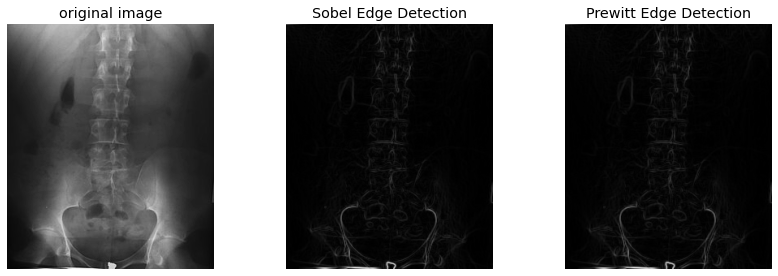

In [ ]:
from skimage import filters
from skimage.util import compare_images

image = im

edge_prewitt = filters.prewitt(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                         figsize=(12, 4))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('original image')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

axes[2].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[2].set_title('Prewitt Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


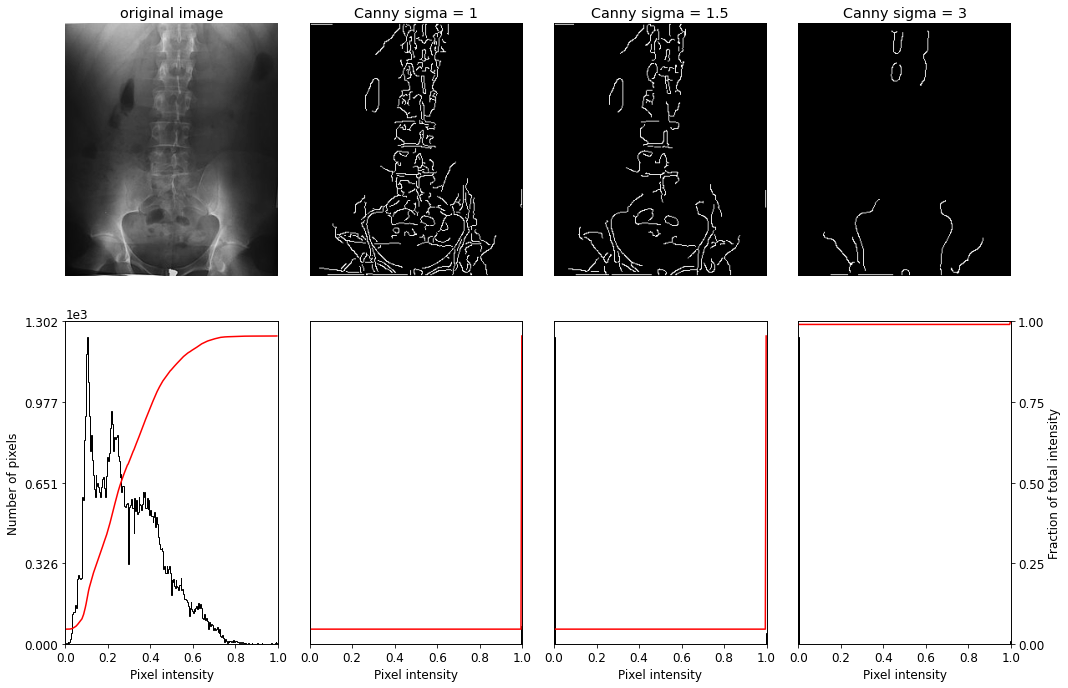

In [ ]:
### Canny edge detection
import copy
matplotlib.rcParams['font.size'] = 12
from skimage import feature
img =copy.deepcopy(im)
# Load an example image


im1 = feature.canny(img)
im2 = feature.canny(img, sigma=1.5)
im3 = feature.canny(img, sigma=3)

# Display results
fig = plt.figure(figsize=(15, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('original image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(im1, axes[:, 1])
ax_img.set_title('Canny sigma = 1')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(im2, axes[:, 2])
ax_img.set_title('Canny sigma = 1.5')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(im3, axes[:, 3])
ax_img.set_title('Canny sigma = 3')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

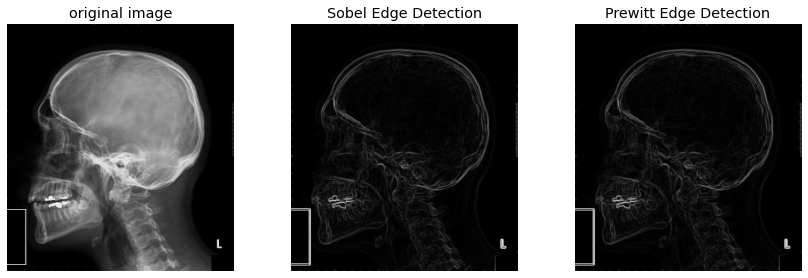

In [ ]:
from skimage import filters
from skimage.util import compare_images

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Lat_lebka.jpg/330px-Lat_lebka.jpg"
a = io.imread(url)

im = color.rgb2gray(a)
#rescaling
a = image_rescaled = rescale(im, 0.5, anti_aliasing=False)

image = im
image = img_as_float(image)
edge_prewitt = filters.prewitt(image)
edge_sobel = filters.sobel(image)

fig, axes = plt.subplots(ncols=3, sharex=True, sharey=True,
                         figsize=(12, 4))

axes[0].imshow(image, cmap=plt.cm.gray)
axes[0].set_title('original image')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

axes[2].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[2].set_title('Prewitt Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()